In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
train_df=pd.read_csv('credit_train.csv')
test_df=pd.read_csv('credit_test.csv')

In [5]:
train_df.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.456417,1.327516,-0.635254,-2.765440,0.282230,-0.758234,0.365270,0.927673,0.033947,-1.138995,...,-0.268150,-1.027990,-0.123132,-1.147477,0.058896,0.434728,0.067085,0.072365,4.0,'0'
1,-0.879383,1.138867,0.834804,0.904867,0.164135,-0.486903,0.286551,0.437374,-0.751725,-0.293550,...,0.208368,0.597398,-0.073658,0.098907,-0.232732,-0.289270,0.314182,0.120301,11.8,'0'
2,1.270210,-0.755504,1.070372,-0.745716,-1.365979,-0.049645,-1.197854,0.207163,-0.677824,0.731290,...,0.475541,1.321484,-0.061854,0.280606,0.297015,-0.050341,0.050163,0.014809,14.0,'0'


In [6]:
print("Train size : rows",train_df.shape[0]," and columns",train_df.shape[1])
print("Test size : rows",test_df.shape[0]," and columns",test_df.shape[1])

Train size : rows 227845  and columns 30
Test size : rows 56962  and columns 30


In [7]:
train_df["source"] = "train"
test_df["source"] = "test"
df = pd.concat([train_df,test_df])

In [8]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,1.149913e-15,3.343825e-16,-1.419190e-15,2.073862e-15,9.978906e-16,1.484022e-15,-5.807513e-16,1.046980e-16,-2.403095e-15,2.256948e-15,...,6.499475e-16,1.525166e-16,-3.424988e-16,2.765342e-16,4.491545e-15,5.149942e-16,1.694293e-15,-3.742146e-16,-1.182487e-16,88.349619
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [9]:
df.isnull().sum().max()

0

In [10]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

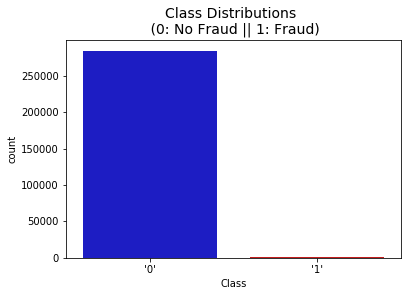

In [11]:
colors = ["#0101DF", "#DF0101"]
sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [12]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))


df.drop(['Amount'], axis=1, inplace=True)

In [13]:
scaled_amount = df['scaled_amount']


df.drop(['scaled_amount'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)

# Amount is Scaled!

df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,source
0,-0.251520,-1.456417,1.327516,-0.635254,-2.765440,0.282230,-0.758234,0.365270,0.927673,0.033947,...,-0.268150,-1.027990,-0.123132,-1.147477,0.058896,0.434728,0.067085,0.072365,'0',train
1,-0.142528,-0.879383,1.138867,0.834804,0.904867,0.164135,-0.486903,0.286551,0.437374,-0.751725,...,0.208368,0.597398,-0.073658,0.098907,-0.232732,-0.289270,0.314182,0.120301,'0',train
2,-0.111786,1.270210,-0.755504,1.070372,-0.745716,-1.365979,-0.049645,-1.197854,0.207163,-0.677824,...,0.475541,1.321484,-0.061854,0.280606,0.297015,-0.050341,0.050163,0.014809,'0',train
3,0.139733,1.967062,0.445029,-2.472415,1.290097,1.284233,-0.398478,0.641294,-0.209637,-0.219990,...,0.011025,0.184953,-0.079679,0.188458,0.516061,-0.521453,-0.005402,-0.030380,'0',train
4,0.599455,-0.626555,1.218109,0.871426,0.950972,-0.311923,-0.711223,0.686529,0.214618,-0.916320,...,0.237543,0.529095,0.015473,0.401008,-0.195985,-0.335558,0.031509,0.106962,'0',train


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values
# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 52773  52971  52994 ... 284804 284805 284806] Test: [    0     1     2 ... 56971 56972 56973]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 52773  52971  52994 ... 113935 113936 113937]
Train: [     0      1      2 ... 284804 284805 284806] Test: [106947 107307 107384 ... 170887 170888 170889]
Train: [     0      1      2 ... 284804 284805 284806] Test: [168824 168871 169872 ... 228361 228455 229223]
Train: [     0      1      2 ... 228361 228455 229223] Test: [227841 227842 227844 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [15]:
df['Class'] = df['Class'].str.replace("'","")

In [16]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [17]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df = df
new_df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,source
178139,0.160274,-0.795638,2.023346,-1.123996,0.708170,0.549575,1.429078,-1.723821,-5.738158,-0.615502,...,1.663083,-1.014281,0.084660,-1.554576,0.952460,-0.159066,0.291875,0.287179,0,train
148191,-0.159435,-0.959156,1.961947,-1.425879,-0.199841,-0.040009,-1.436193,0.304802,0.607620,0.020472,...,0.289537,0.985329,-0.075484,-0.081633,-0.184852,-0.122661,0.359797,0.182852,0,train
191749,-0.279746,1.201135,0.057694,0.577186,0.572928,-0.703247,-0.833298,-0.173894,0.043467,0.078150,...,-0.215490,-0.760369,0.173452,0.474882,0.091441,0.071236,-0.045890,0.006594,0,train
1485,0.041920,1.354196,-0.615297,0.424670,-0.832530,-1.005418,-0.539372,-0.705519,0.026451,-0.857378,...,-0.068262,-0.431772,0.078890,-0.035418,0.207750,-0.475794,-0.002927,0.009990,0,test
206121,0.109690,-0.298761,0.921749,-0.165774,-0.460667,0.040680,-0.186185,-0.031449,0.543738,0.426889,...,0.222933,0.767480,0.032529,0.434826,-0.627750,0.484521,0.232913,0.137498,0,train


In [18]:
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df=df
new_df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,source
178139,0.160274,-0.795638,2.023346,-1.123996,0.708170,0.549575,1.429078,-1.723821,-5.738158,-0.615502,...,1.663083,-1.014281,0.084660,-1.554576,0.952460,-0.159066,0.291875,0.287179,0,train
148191,-0.159435,-0.959156,1.961947,-1.425879,-0.199841,-0.040009,-1.436193,0.304802,0.607620,0.020472,...,0.289537,0.985329,-0.075484,-0.081633,-0.184852,-0.122661,0.359797,0.182852,0,train
191749,-0.279746,1.201135,0.057694,0.577186,0.572928,-0.703247,-0.833298,-0.173894,0.043467,0.078150,...,-0.215490,-0.760369,0.173452,0.474882,0.091441,0.071236,-0.045890,0.006594,0,train
1485,0.041920,1.354196,-0.615297,0.424670,-0.832530,-1.005418,-0.539372,-0.705519,0.026451,-0.857378,...,-0.068262,-0.431772,0.078890,-0.035418,0.207750,-0.475794,-0.002927,0.009990,0,test
206121,0.109690,-0.298761,0.921749,-0.165774,-0.460667,0.040680,-0.186185,-0.031449,0.543738,0.426889,...,0.222933,0.767480,0.032529,0.434826,-0.627750,0.484521,0.232913,0.137498,0,train


Distribution of the Classes in the subsample dataset
0    0.998273
1    0.001727
Name: Class, dtype: float64


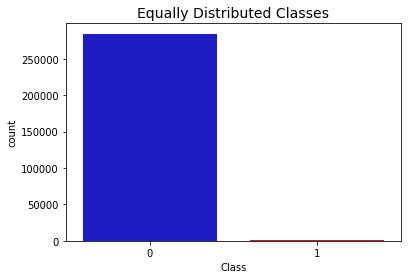

In [19]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [20]:
X = new_df.drop(['Class','source'], axis=1)
y = new_df['Class']

In [21]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

C:\Users\bhuji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bhuji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bhuji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bhuji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bhuji\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Classifiers:  LogisticRegression Has a training score of 100.0 % accuracy score


In [ ]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []


In [ ]:
log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
      accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)